**Text based sentimental analysis**

In [24]:
#Load packages
import pandas as pd
import numpy as np

In [25]:

#Load data viz pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
!pip install neattext

In [27]:
import neattext.functions as nfx

In [28]:
#Load dataset
df = pd.read_csv("/content/amazon_cells_labelled.csv")

In [29]:
#Preview dataset
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [30]:
df.shape

(31435, 2)

In [31]:
#Check for datatypes
df.dtypes

Emotion    object
Text       object
dtype: object

In [32]:
#check for null values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [33]:
#valuecount of emotions
df['Emotion'].value_counts()

joy         9989
sadness     6078
fear        4891
anger       3853
surprise    3652
neutral     2039
disgust      794
shame        139
Name: Emotion, dtype: int64

<Axes: >

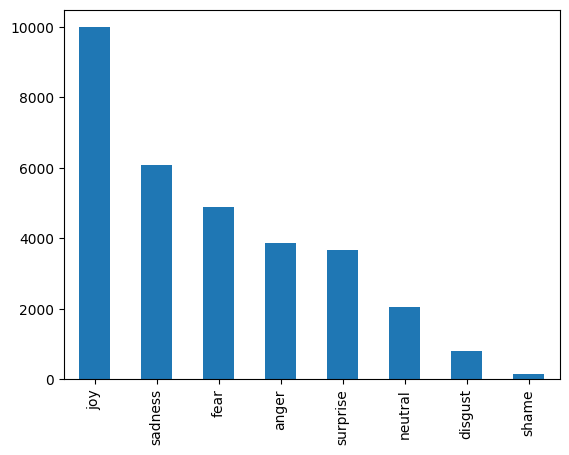

In [34]:
df['Emotion'].value_counts().plot(kind = "bar")

<Axes: xlabel='Emotion', ylabel='count'>

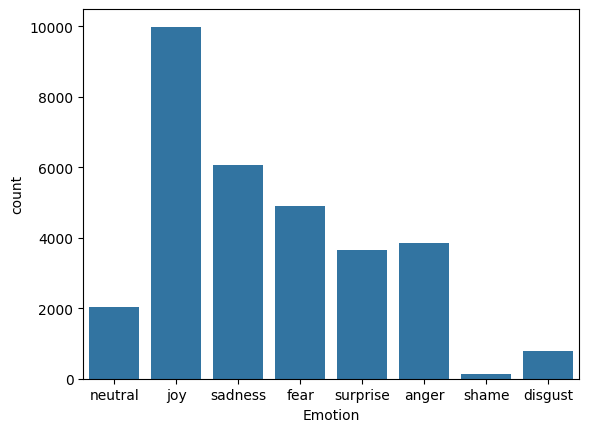

In [35]:
sns.countplot(x="Emotion",data=df)

#Exploration
+ Sentiment analysis
+ Keyword Ectraction
- Keywords for each emotion
-Wordcloud


In [36]:
# sentiment analysis
from textblob import TextBlob

In [37]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = "Positive"
  elif sentiment < 0:
    result = "Negative"
  else:
    result = "Neutral"
  return result

In [38]:
get_sentiment("wow! such a beautiful day")

'Positive'

In [39]:
df["Sentiment"] = df["Text"].apply(get_sentiment)

In [40]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [41]:
#Compare emotion with sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1606
          Neutral      1253
          Positive      994
disgust   Negative      297
          Neutral       230
          Positive      267
fear      Negative     1373
          Neutral      1676
          Positive     1842
joy       Negative     1533
          Neutral      3301
          Positive     5155
neutral   Negative      160
          Neutral      1383
          Positive      496
sadness   Negative     2366
          Neutral      1913
          Positive     1799
shame     Negative       45
          Neutral        49
          Positive       45
surprise  Negative      561
          Neutral      1395
          Positive     1696
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

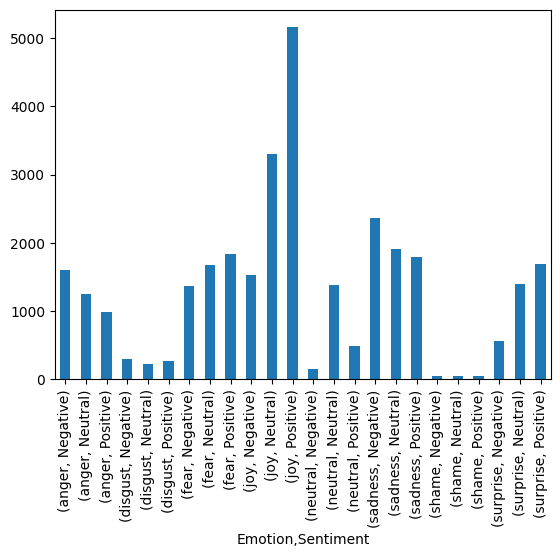

In [42]:
# First method using matplot lib
df.groupby(['Emotion','Sentiment']).size().plot(kind="bar")

In [43]:
!pip install --upgrade seaborn

In [44]:
#using seaborn
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)>

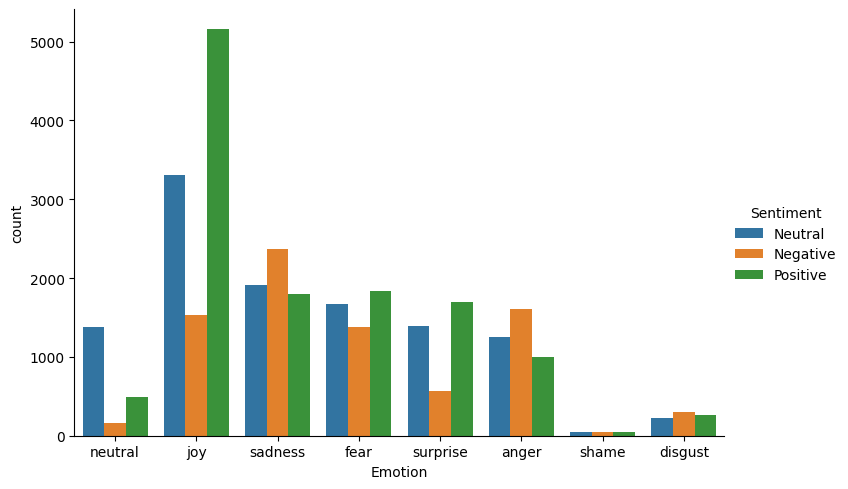

In [45]:
sns.catplot(x="Emotion", hue='Sentiment',data = df, kind='count',aspect=1.5)

#Text cleaning
Remove noise
stopwords
punctuations
emojis

In [46]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [47]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [50]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [51]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [52]:
#compare text with cleaned text
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,Why
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz for u babe naamazed nga ...
...,...,...
31430,You block your dream when you allow your fear ...,You block your dream when you allow your fear ...
31431,I feel old. I don't recognize any Disney Chann...,I feel old I dont recognize any Disney Channel...
31432,"has dawned upon the world, promised from creat...",has dawned upon the world promised from creati...
31433,The computer at school had left out my name al...,The computer at school had left out my name al...


#Keyword ectraction
+ Extract most commenste word from emotiuons

In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text, num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [ ]:
emotion_list = df['Emotion'].unique().tolist()

In [ ]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [ ]:
joy_list=df[df["Emotion"] == "joy"]["Clean_Text"]

In [ ]:
joy_list

1          Sage Act upgrade on my to do list for tommorow.
3         Such an eye ! The true hazel eye-and so brill...
4          ugh babe.. hugggzzz for u .!  babe naamazed ...
12       For once in his life , Leopold must have been ...
17         I have a feeling i will fail french #fuckfrench
                               ...                        
31419    the SECOND I start telling   a story, the cab ...
31421    is my kids reaching into their stockings on Xm...
31429                          Sale sale sale! :&quot;&gt;
31432    has dawned upon the world, promised from creat...
31433    The computer at school had left out my name al...
Name: Clean_Text, Length: 9989, dtype: object

In [ ]:
joy_list=df[df["Emotion"] == "joy"]["Clean_Text"].to_list()

In [ ]:
joy_list

['Sage Act upgrade on my to do list for tommorow.',
 " Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself . ",
 "  ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang ",
 'For once in his life , Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition . ',
 'I have a feeling i will fail french #fuckfrench',
 " Good.Let ' s go now . ",
 'When I fell in love with \\X\\".  Overnight I felt confidence, self-esteem,    responsible and worthwhile."',
 'One could

In [ ]:
joy_docx = ''.join(joy_list)

In [ ]:
joy_docx

'Sage Act upgrade on my to do list for tommorow. Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being \' the picture of health \' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .   ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega\'s mas pinaramdam at fil ko ang For once in his life , Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition . I have a feeling i will fail french #fuckfrench Good.Let \' s go now . When I fell in love with \\X\\".  Overnight I felt confidence, self-esteem,    responsible and worthwhile."One could get terribly ecstatic but that 

In [ ]:
#Extract the keywords
keyword_joy = extract_keywords(joy_docx)

In [ ]:
keyword_joy

{'the': 4768,
 'to': 4233,
 'I': 3793,
 'a': 3258,
 'and': 2888,
 'of': 2495,
 'my': 2488,
 'in': 2061,
 'for': 1795,
 '.': 1769,
 'is': 1419,
 'with': 1247,
 ',': 1201,
 'that': 1079,
 'you': 1039,
 'was': 1030,
 'at': 1009,
 'on': 977,
 'have': 868,
 'me': 859,
 'be': 793,
 'it': 764,
 'this': 700,
 '&amp;': 608,
 'had': 576,
 'all': 546,
 'so': 534,
 'up': 530,
 'day': 519,
 'when': 494,
 'your': 475,
 "I'm": 451,
 'time': 438,
 'not': 431,
 'an': 426,
 'get': 425,
 'from': 424,
 'like': 413,
 'just': 386,
 'about': 384,
 'are': 383,
 'out': 376,
 'The': 371,
 'Christmas': 360,
 'but': 352,
 'work': 352,
 'as': 345,
 'i': 332,
 'When': 323,
 'we': 321}

In [ ]:
#Plot
def plot_most_common_words(mydict):
  df_01 = pd.DataFrame(list(mydict.items()), columns=['token', 'count'])
  plt.figure(figsize=(20,10))
  sns.barplot(x='token', y='count', data = df_01, hue = "token")
  plt.xticks(rotation=45)
  plt.show()

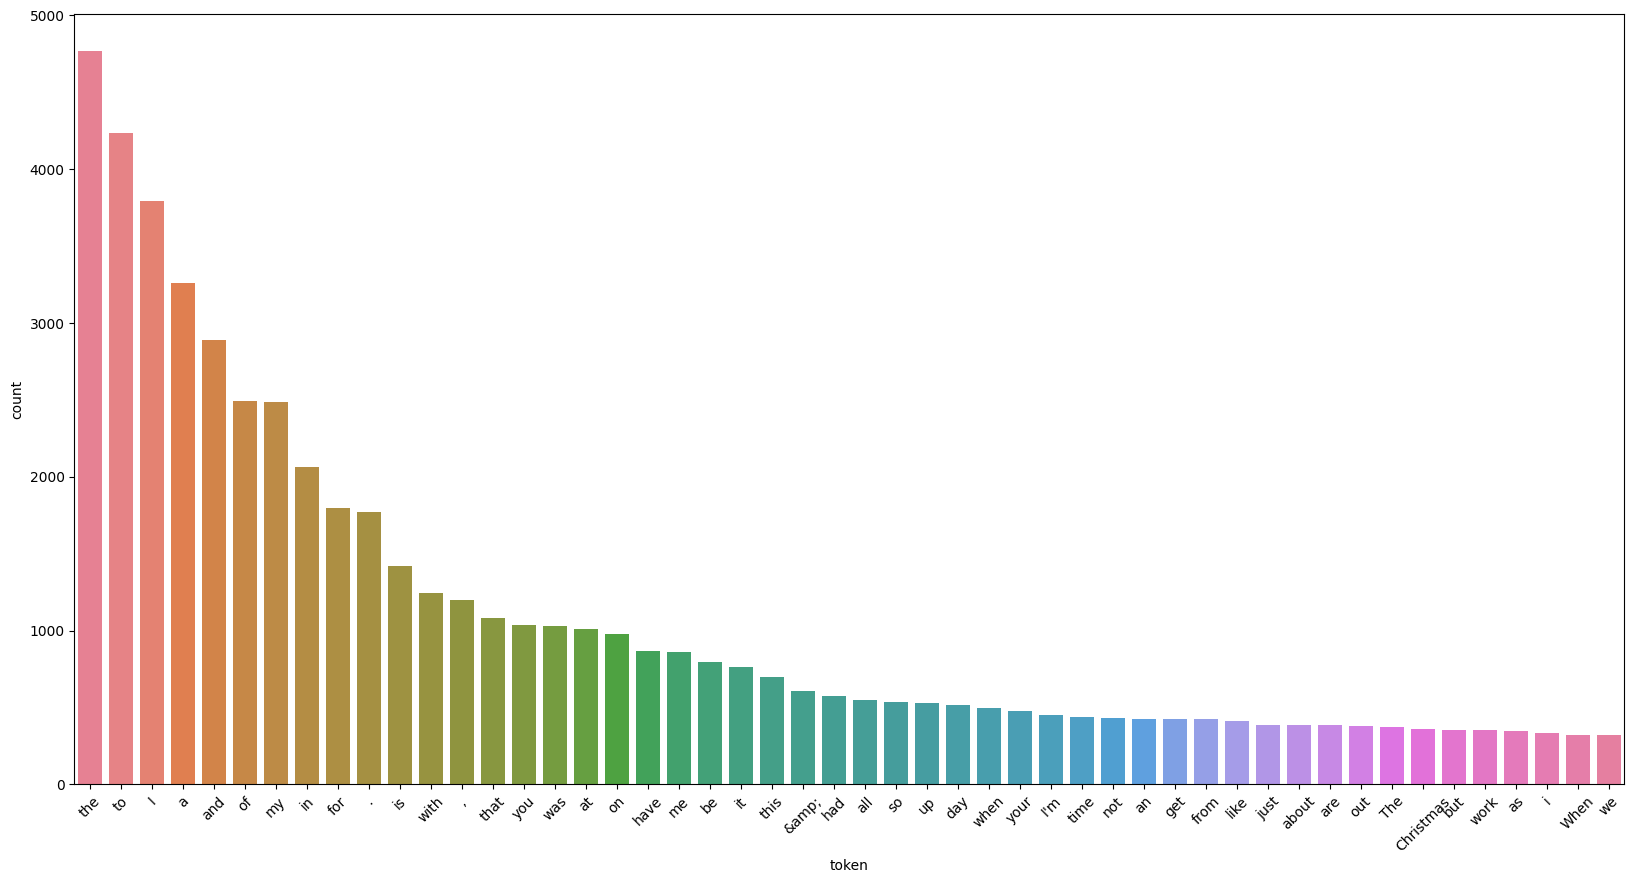

In [ ]:
plot_most_common_words(keyword_joy)

In [ ]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
#Document it
surprise_docx = ''.join(surprise_list)
#Extract_keywords
keyword_surprise = extract_keywords(surprise_docx)

In [ ]:
keyword_surprise

{'the': 1233,
 'to': 1085,
 'a': 1070,
 'I': 892,
 'my': 740,
 'and': 719,
 'in': 660,
 'of': 530,
 'for': 528,
 'is': 478,
 'you': 456,
 'on': 355,
 'was': 333,
 'that': 317,
 'me': 296,
 'it': 295,
 'en': 266,
 'een': 263,
 'at': 238,
 '.': 226,
 'with': 225,
 'de': 222,
 'be': 217,
 'when': 211,
 'have': 207,
 'i': 204,
 ',': 199,
 'out': 192,
 'up': 188,
 'your': 185,
 'this': 183,
 'just': 183,
 "I'm": 180,
 'so': 152,
 'from': 146,
 'are': 145,
 'her': 143,
 'not': 141,
 'but': 136,
 'van': 134,
 'we': 133,
 'he': 133,
 ':)': 131,
 'one': 130,
 'know': 129,
 'she': 128,
 'what': 121,
 'ik': 117,
 'home': 116,
 'his': 116}

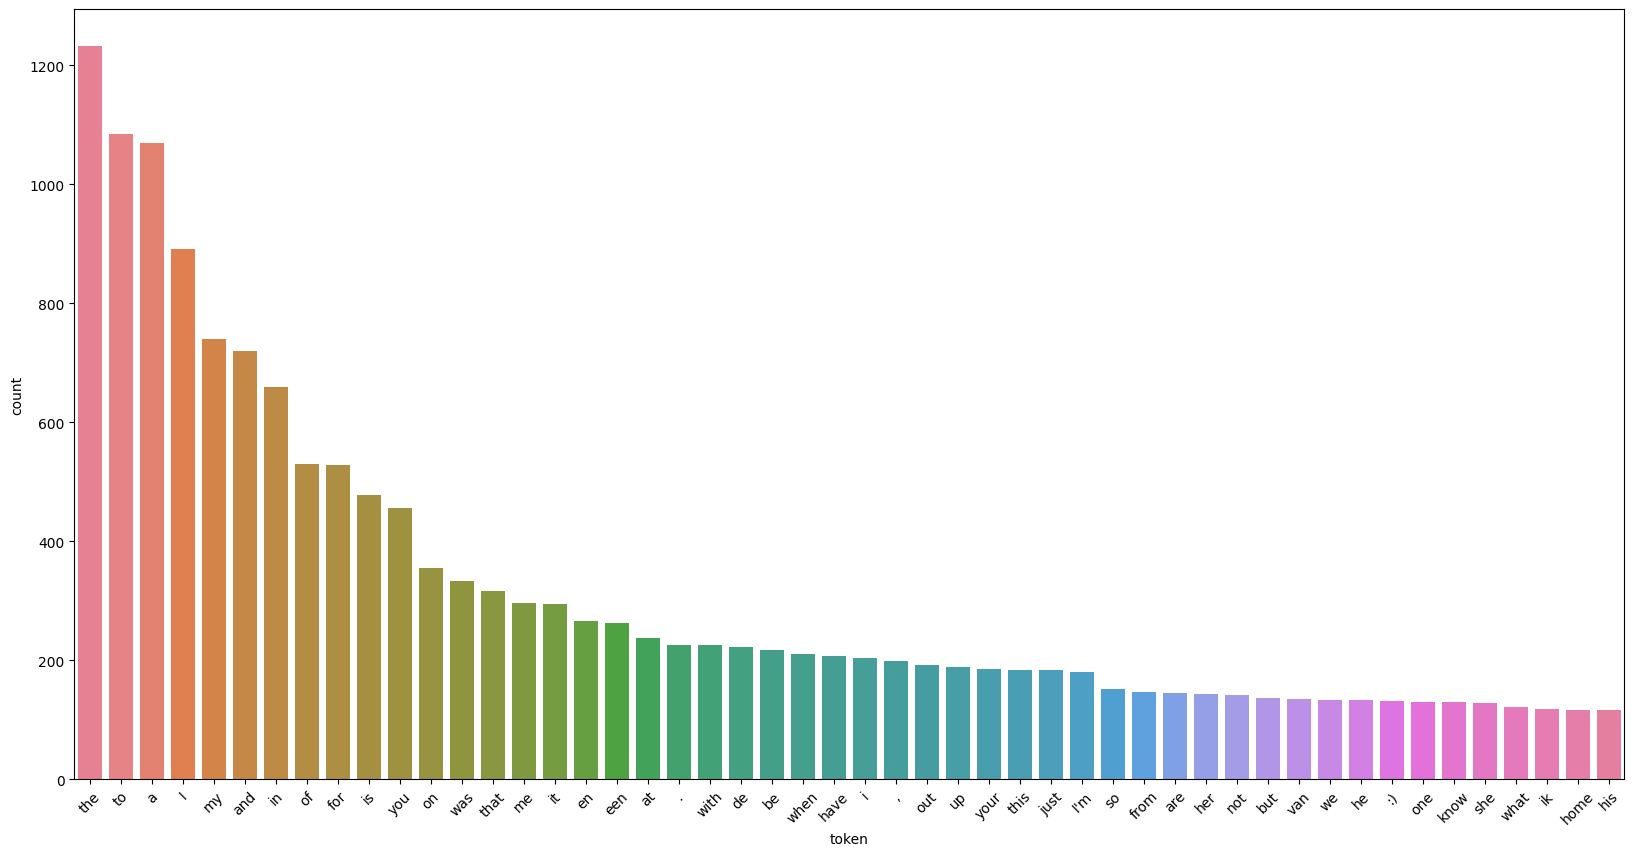

In [ ]:
plot_most_common_words(keyword_surprise)

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_cloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation = 'bilinear')
  plt.show()

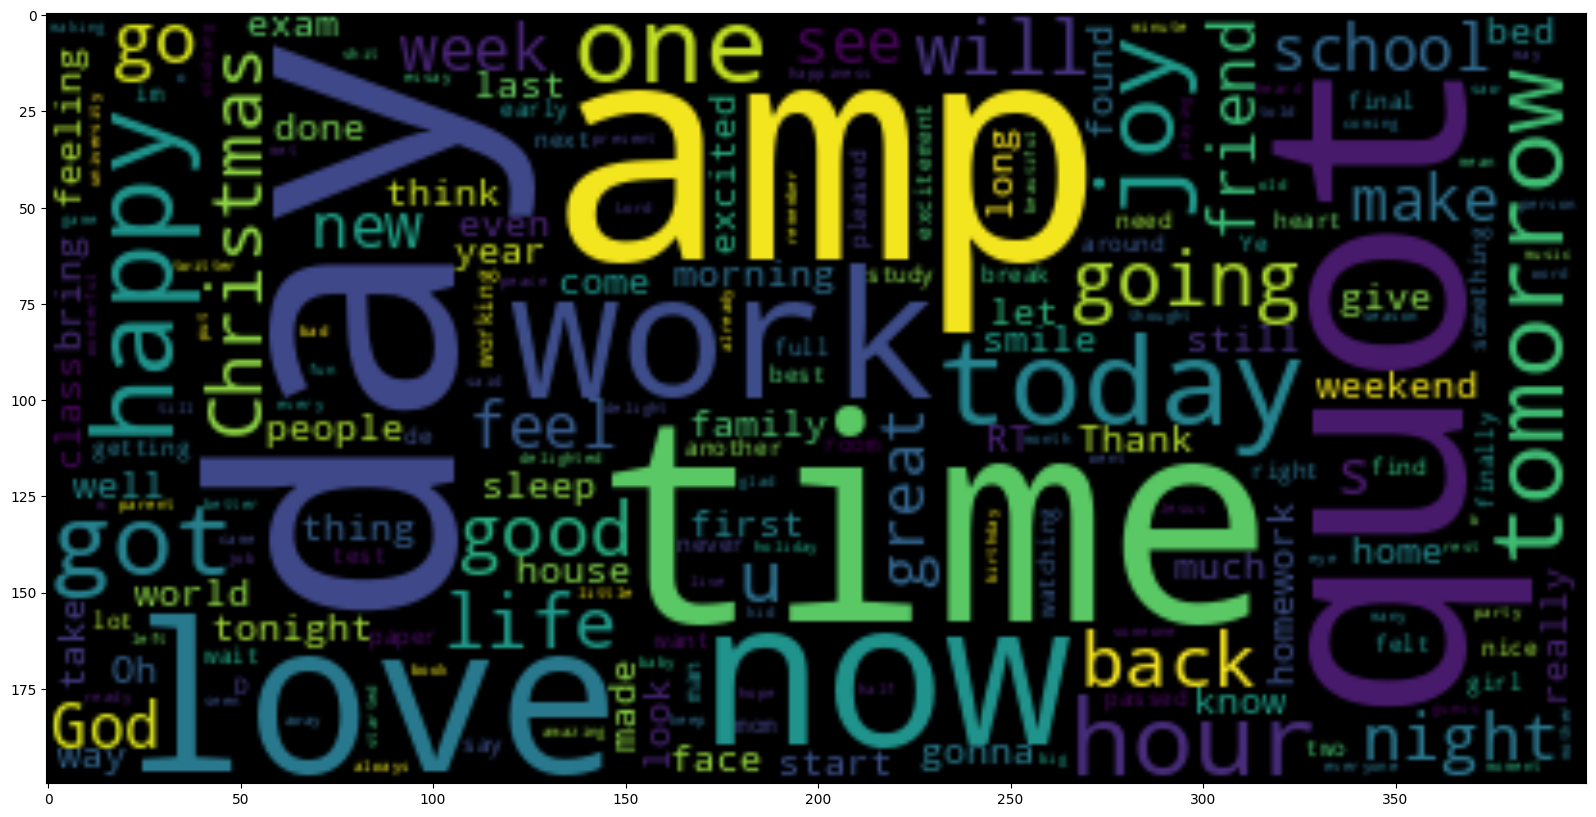

In [ ]:
plot_cloud(joy_docx)

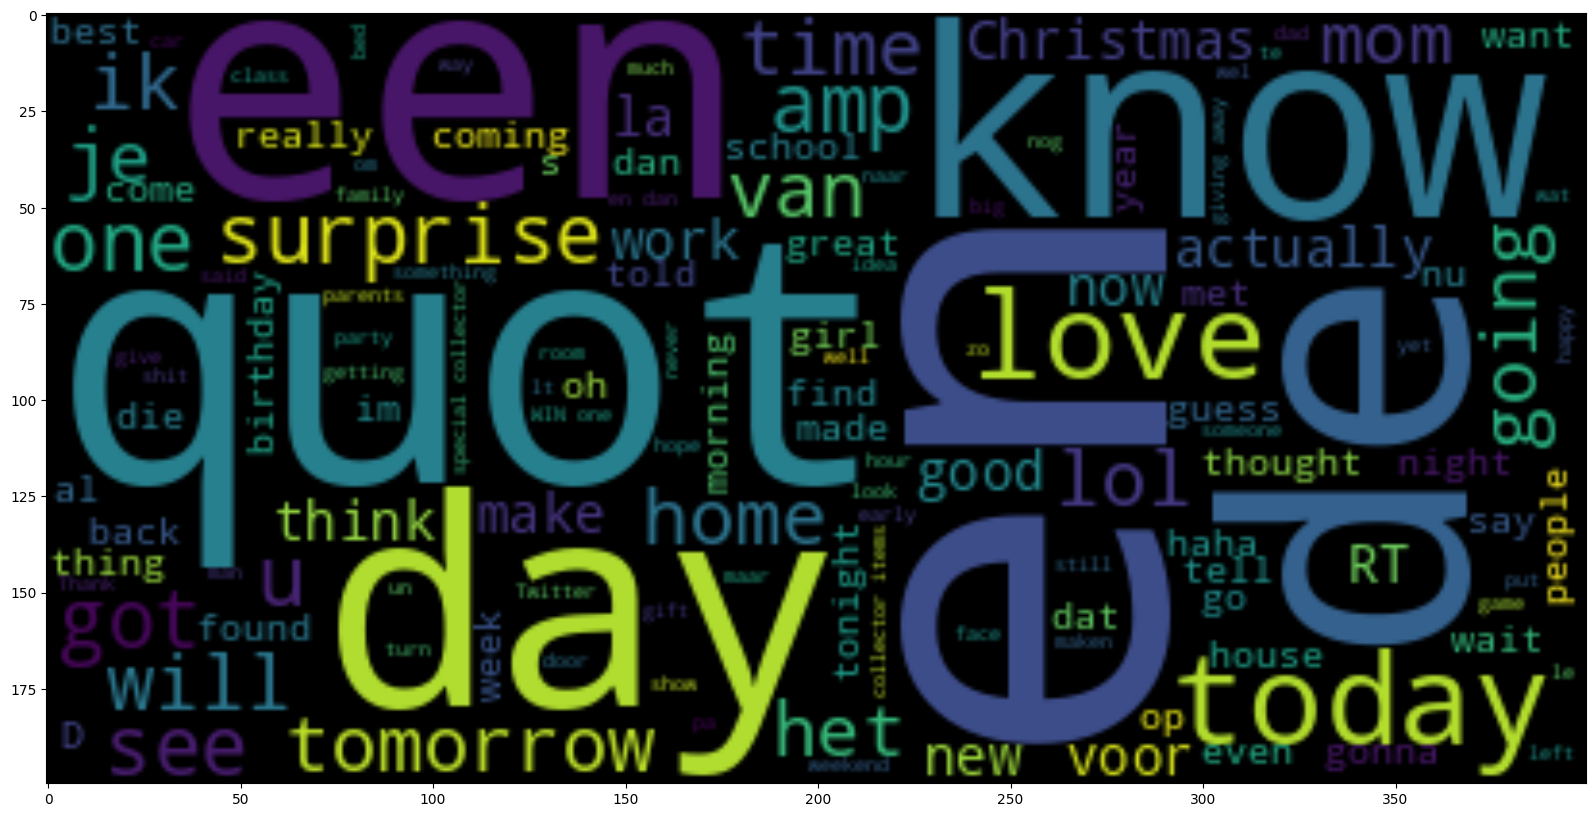

In [ ]:
plot_cloud(surprise_docx)

##Machine learning
-Naive bayes
-LogisticRegression
-KNN
-DecisionTree

##Notes:

While both classification and regression are types of supervised learning algorithms, they differ in the type of output they predict. Classification algorithms predict discrete outputs such as ‘yes or no’, ‘spam or not spam’, or ‘cat, dog, or bird’. On the other hand, regression algorithms are used to predict continuous outputs. For example, a regression algorithm might predict the price of a house based on features like its size and location.
In short, use classification when your output is categorical, and regression when your output is numerical.



##KNN:
Instance-based means that KNN does not create a model from the training data but instead uses the training instances (or observations) themselves in the classification or prediction process.



##Naive bayes

Despite their simplicity, they are known for creating competent models, even when the ‘naive’ assumption they make doesn’t hold true.

#Logistic Regression
It is a predictive analysis algorithm, which, despite its name, is employed when the dependent variable is categorical. It’s particularly well-suited for binary classification problems — situations with two possible outcomes.

In [ ]:
!pip install --upgrade scikit-learn

##Why do we use vectorizer?
Let’s say we have a dataset containing 100.000 data points
and we want to perform some sort of operation on every single
 one of those points. If we use a regular loop for this,
things will get very inefficient very quickly. If we can instead
vectorize our operation and just perform one (or a few) large vector or
matrix operation using something like NumPy, our code will run a lot faster

In [ ]:
# Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vextorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Split our dataset
from sklearn.model_selection import train_test_split

In [ ]:
###Build  feautures from Our Test

In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
Xfeatures

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4          ugh babe.. hugggzzz for u .!  babe naamazed ...
                               ...                        
31430    You block your dream when you allow your fear ...
31431    I feel old. I don't recognize any Disney Chann...
31432    has dawned upon the world, promised from creat...
31433    The computer at school had left out my name al...
31434     Not at all . The feedback from audience has b...
Name: Clean_Text, Length: 31435, dtype: object

In [ ]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [ ]:
cv.get_feature_names_out()

array(['00', '000', '000calories', ..., 'ℕoíʀ', 'ㄒʜℰℳℰ', '姑姑'],
      dtype=object)

In [ ]:
# To dense array
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X,ylabels,test_size = 0.3,random_state = 42)

In [ ]:
###Build Our Model

In [ ]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#Accuracy
nv_model.score(X_test, y_test)

0.5542360301134557

In [ ]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['joy', 'joy', 'neutral', ..., 'sadness', 'sadness', 'joy'],
      dtype='<U8')

### Make a single prediction
+ Vectorized out text
+ Applied our model

In [ ]:
sample_text = ["I love coding so much"]

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [ ]:
#Check for predictions Probability(percentage)/ confidence score
nv_model.predict_proba(vect)


array([[1.91859165e-02, 5.85433660e-04, 1.35052975e-01, 5.03793476e-01,
        7.86302926e-03, 2.63690862e-01, 2.32226982e-06, 6.98259856e-02]])

In [ ]:
# Get all classes for model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [ ]:
np.max(nv_model.predict_proba(vect))

0.5037934759739784

In [ ]:
def predict_emotion(sample_text, model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_,model.pred_proba))
  print(prediction[0])
  return pred_percentage_for_all

In [ ]:
predict_emotion(sample_text, nv_model)

AttributeError: 'MultinomialNB' object has no attribute 'pred_proba'